# Análisis y tratamiento de señales musculares (EMG) 
***Física Computacional***


**Azaneth González Domínguez**,
**Cecilia Hernández Bautista**,
**Gael García Trejo**



_15/12/22_

### RESUMEN
En el proyecto detallado a continuación se presenta el análisis de señales electromiográficas de superficie (EMGs) en el bíceps al realizar movimientos de contracción y relajación muscular. Esto con el objetivo de analizar las características de las activaciones musculares con relación a la fatiga muscular, a través de un electromiógrafo construido ....
___

### INTRODUCCIÓN 


Las  señales  Electromiográficas (EMG)  son  fuente  de  información  muy  apropiada  para procesos de rehabilitación y fisioterapia debido a la información que estas otorgan sofre el funcionamiento del estado fisiológico de los músculos analizados. $^{[1]}$

Las señales EMG superficiales (EMGs) son  generadas por la contracción
muscular, por lo que su adquisición requiere de una correcta
identificación de las regiones musculares comprometidas en
la ejecución de los movimientos a clasificar, además,  son esencialmente un patrón unidimensional, por lo que cualquier  técnica de procesamiento de señales para extracción de características y  reconocimiento de patrones se puede aplicar a este tipo de señales.$^{[2],[3]}$

Las señales EMGS, son colectadas típicamente mediante electrodos bipolares de superficie, ubicados sobre la piel. Esencialmente se colocan dos electrodos, un par en el origen del músculo a examinar y el último en una articulación próxima al músculo estudiado. ^{[4]}$

Por su parte, la herramienta matemática de la que se hará uso para procesar la señal es la Transformada de Fourier (TF), la cual expresa una función periódica como una suma de exponenciales complejas periódicas tal como se describe en la siguiente ecuación 
$$
X(f) \int_{- \infty}^{\infty}  x(t) e^{-2\pi ft}dt
$$

 Esta se puede entender como el producto escalar entre la función $x(t)$ y la exponencial compleja $ e^{-2\pi ft}$ evaluado sobre todo el rango de frefuencias $f$.
La transformada de Fourier se utiliza para pasar una señal al dominio de frecuencia para así obtener información que no es evidente en el dominio temporal.
___

### OBJETIVO
Analizar y aplicar la transformada de Fourier a una señal muscular obtenida a través de un electromiógrafo para analizar las características de las activaciones musculares con relación a la fatiga muscular.


### DESARROLLO
La adquisición de señales EMGS se realizó con un prototipo de un electromiógrafo, estas señales recogidas llevan un un procesamiento previo debido a su naturaleza, es decir, se realizaron etapas de filtrado, amplificación y demodulación para poder visualizar de mejor mañera la señal.
En este caso nuestro prototipo del electro miógrafo realiza dos amplificaciones, una demodulación y un filtrado de frecuencias bajas, dándonos como resultado una señal aproximadamente de 5 volt limpia y con un mínimo ruido. En la siguiente figura se muestra las pasos que se siguieron para la obtención de la señal muscular. 


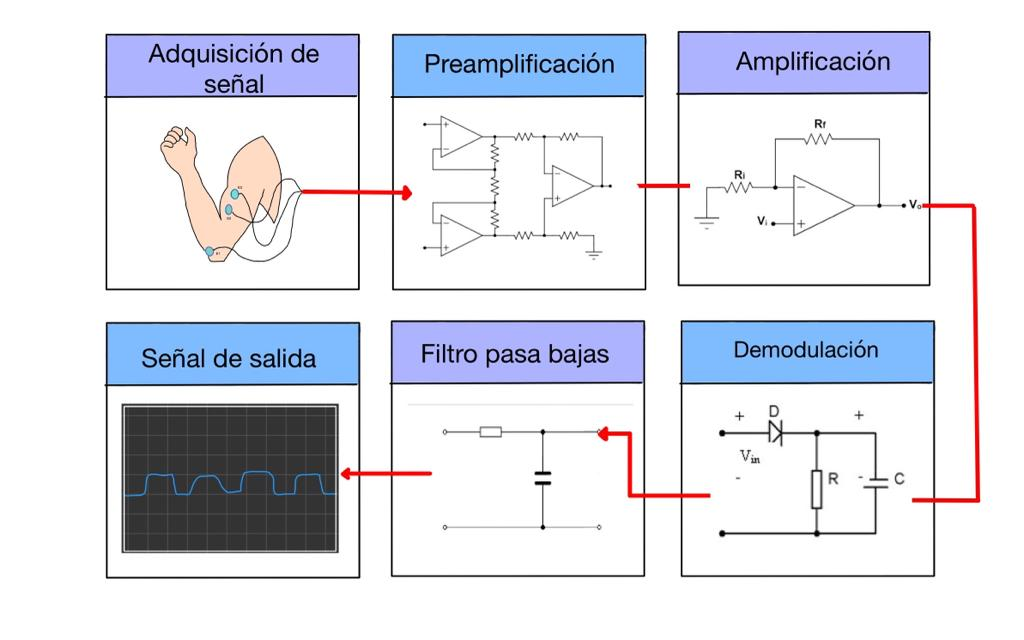

In [8]:
from IPython.display import Image
Image(filename='Diagrama de bloques.jpg')


Una vez obtenida nuestra señal, se procedió con el análisis y procesamiento de la misma, para ello se utilizó el Lenguaje Python.

### RESULTADOS

In [25]:
#Se importaron las paqueterías a utilizar
from pandas import *
from pylab import *
import numpy as np
import datetime
import matplotlib.pyplot as plt


Se importaron los datos tipo csv. En primera instancia se visualizaron los valores tal cual venían en el osciloscopio.

In [32]:
df=read_csv('F0001CH2.csv')
print(df.to_string())
Datos_value = read_csv('F0001CH2.csv', usecols = ['Value'])

       Time  Value
0      0.00  -5.12
1      0.01  -5.12
2      0.02  -5.12
3      0.03  -5.12
4      0.04  -5.12
5      0.05  -5.12
6      0.06  -5.12
7      0.07  -5.12
8      0.08  -5.12
9      0.09  -5.12
10     0.10  -5.12
11     0.11  -5.12
12     0.12  -5.12
13     0.13  -5.12
14     0.14  -5.12
15     0.15  -5.12
16     0.16  -5.12
17     0.17  -5.12
18     0.18  -5.12
19     0.19  -5.12
20     0.20  -5.12
21     0.21  -5.12
22     0.22  -5.12
23     0.23  -5.12
24     0.24  -5.12
25     0.25  -5.12
26     0.26  -5.12
27     0.27  -0.16
28     0.28  -0.16
29     0.29  -0.20
30     0.30  -0.12
31     0.31  -0.16
32     0.32  -0.16
33     0.33  -0.12
34     0.34  -0.16
35     0.35  -0.16
36     0.36  -0.12
37     0.37  -0.16
38     0.38  -0.16
39     0.39  -0.16
40     0.40  -0.12
41     0.41  -0.12
42     0.42  -0.16
43     0.43  -0.16
44     0.44  -0.20
45     0.45  -0.12
46     0.46  -0.12
47     0.47  -0.12
48     0.48  -0.16
49     0.49  -0.12
50     0.50  -0.04
51     0.51 

Posteriormente se graficaron esos datos, para ajustarlos y quitar el ruido que estos tenían.

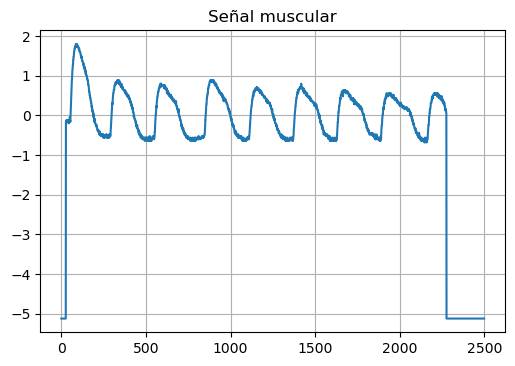

In [34]:
figure(dpi=100)
n=np.linspace(0,11,11)
title("Señal muscular")
#Limpiamos la señal, quedándonos únicamente con los pulsos musculares
plot(Datos_value['Value'])
grid(True)
show()



Con ayuda de la misma lista de valores, se identificaron los límites de la función y se volvió a graficar 

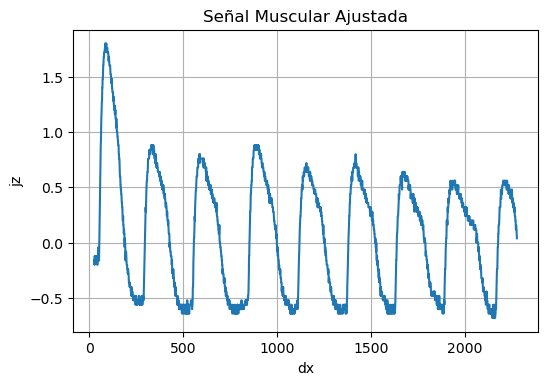

In [35]:
figure(dpi=100)
n=np.linspace(0,11,11)
title("Señal Muscular Ajustada")
#Limpiamos la señal, quedándonos únicamente con los pulsos musculares
plot(Datos_value['Value'][27:2277])
xlabel('dx')
ylabel('jz')
grid(True)
show()



Una vez "limpia" la señal, con ayuda de la paquetería Fourier Transforms (scipy.fft) para aplicar dicha tranformada a los datos.

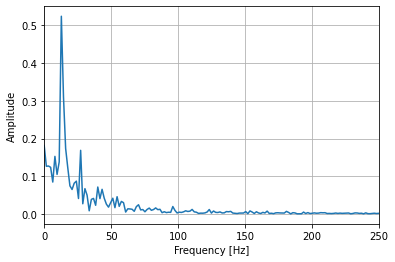

In [38]:
data = Datos_value['Value'][27:2277]
N = data.shape[0] #number of elements
t = np.linspace(0, N * 3600, N) #converting hours to seconds
s = data
T = t[1] - t[0]
S_fft = np.fft.fft(s)
S_fftfreq = np.fft.fftfreq(len(s),1/T)[:len(s)//2]

#Graficando así los datos con la transformada
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(S_fftfreq,(2/len(s))*abs(S_fft[0:len(s)//2]))
xlim([0,250])
plt.grid(True)
plt.show()


Bibliografía 
$[1]$ Avila, J. y Fajardo, F. (2019). Análisis entre señales electromiográficas en los músculos cervicales y el ángulo de inclinación de la cabeza en niños con PCI entre 5 y 10 años aplicada a terapia cervical. Universidad Politécnica Salesiana. Recuperado el 13 de diciembre de 2022, de: https://dspace.ups.edu.ec/bitstream/123456789/17997/1/UPS-CT008551.pdf 

$[2]$ Romo, H., et.al. (2007). Análisis de Señales EMG Superficiales y su Aplicación en el Control de Prótesis de Mano. Revista Avances en Sistemas e Informática, Vol. 4,  Nº. 1, ISSN 16577663.

$[3]$ García, J. y Mendoza, L. (2014). Adquisición y pPocesamiento de Señales EMG para Controlar Movimiento de un Brazo Hidráulico. Universidad de Pamplona. ISSN-e 2216-0388, ISSN 2216-0353, Vol. 4, Nº. 7, págs. 49-60. 

$[4]$ Zecca M., Micera S., Carroza M., Dario P., “Control Of Multifunctional Prosthetic Hands
By Processing The Electromyographic Signal”, Critical Reviews™ in Biomedical Engineering. Vol. 30, pp. 459 485.2002.
